# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE                   # For Oversampling
#from outliers import smirnov_grubbs as grubbs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC


import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline
import seaborn as sns

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


# Reading the Dataset

In [2]:
caravan = read_csv('./caravan-insurance-challenge.csv')

var=16 

In [3]:
print(caravan.describe())
print('Variables selected :  ', list(caravan.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]))

selected = caravan.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]

X = (caravan[caravan.columns[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]].values)



# Normalization - Using MinMax Scaler
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

y = np.vstack(caravan['CARAVAN'].values)

print('\n')
print('X and y Input Data:   ', X.shape, y.shape)


X_train_original, X_test2, y_train_original, y_test2 = train_test_split(X, y, test_size=0.3,
                                                                        random_state=165)

print('Training Set Shape:   ', X_train_original.shape, y_train_original.shape)

X_val, X_test, y_val, y_test = train_test_split(X_test2, y_test2, test_size=0.33,random_state=165)
# Used Seed in Partitioning so that Test Set remains same for every Run

print('Validation Set Shape: ', X_val.shape,y_val.shape)
print('Test Set Shape:       ', X_test.shape, y_test.shape)


           MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF     MOSHOOFD  \
count  9822.000000  9822.000000  9822.000000  9822.000000  9822.000000   
mean     24.253207     1.108735     2.677561     2.996437     5.779067   
std      12.918058     0.412101     0.780701     0.804660     2.874148   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     6.000000     6.000000    10.000000   

            MGODRK       MGODPR       MGODOV       MGODGE       MRELGE  \
count  9822.000000  9822.000000  9822.000000  9822.000000  9822.000000   
mean      0.700672     4.637650     1.050092     3.262981     6.188964   
std       1.015107     1.721212     1.011156     1.606287     1.896070   
min       0.000000     0.000000     0

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Outlier Detection

In [6]:
# for i in range(var):
#    print((grubbs.test(X_train[:,i], alpha=0.025).reshape(-1)).shape)

# Oversampling of an Underrepresented Class

In [7]:
doOversampling = True

if doOversampling:
# Apply regular SMOTE
    sm = SMOTE(kind='regular')
    X_train, y_train = sm.fit_sample(X_train_original, y_train_original)
    print('Training Set Shape after oversampling:   ', X_train.shape, y_train.shape)
    print(pd.crosstab(y_train,y_train))
else:
    X_train = X_train_original
    y_train = y_train_original

Training Set Shape after oversampling:    (12928, 16) (12928,)
col_0     0     1
row_0            
0      6464     0
1         0  6464


C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Variable Selection Scatterplot

In [8]:
# Plot the feature importances of the forest
'''
plt.figure(figsize=(6 * 2, 2.4 * int(var/2+.5)))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
plt.title("Variable Co-relation with Outcome",size=20)
for i in range(var):
    plt.subplot(8, 2, i+1)
    plt.title(selected[i], size=9,color='darkslateblue',fontweight='bold')
    plt.scatter(range(len(X)),X[:,i], s=40, marker= 'o',c=((y[:,0:1])+20).reshape(-1), alpha=0.5)
    plt.yticks()
    plt.xticks()
plt.show()
'''

'\nplt.figure(figsize=(6 * 2, 2.4 * int(var/2+.5)))\nplt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)\nplt.title("Variable Co-relation with Outcome",size=20)\nfor i in range(var):\n    plt.subplot(8, 2, i+1)\n    plt.title(selected[i], size=9,color=\'darkslateblue\',fontweight=\'bold\')\n    plt.scatter(range(len(X)),X[:,i], s=40, marker= \'o\',c=((y[:,0:1])+20).reshape(-1), alpha=0.5)\n    plt.yticks()\n    plt.xticks()\nplt.show()\n'

# Feature Reduction PCA

In [9]:
doPCA = False

if doPCA:
    pca = PCA(svd_solver='randomized',n_components=10,random_state=42).fit(X_train)

    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)
    #print(pca.components_)
    #print(pca.explained_variance_)
    #print(pca.explained_variance_ratio_) 
    #print(pca.mean_)
    print(pca.n_components_)
    print(pca.noise_variance_)
    plt.figure(1, figsize=(8, 4.5))
    plt.clf()
    plt.axes([.2, .2, .7, .7])
    plt.plot(pca.explained_variance_, linewidth=2)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_')
    plt.show()
else:
    X_train = X_train
    X_val = X_val  

# Flag for Final Run

In [10]:
Final_Run = True

# Decision Tree Classifier

In [11]:
clf_DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features=None, 
                                max_leaf_nodes=None, min_impurity_split=1e-07)
clf_DT.fit(X_train, y_train)
y_pred_DT = clf_DT.predict(X_val)

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


# Naive Bayes Classifier

In [12]:
clf_NB = BernoulliNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_val)
print(clf_NB.predict_proba(X_val))

[[ 0.73478704  0.26521296]
 [ 0.99777834  0.00222166]
 [ 0.60750474  0.39249526]
 ..., 
 [ 0.60689011  0.39310989]
 [ 0.96187579  0.03812421]
 [ 0.95379685  0.04620315]]


# Neural Network Classifier

In [13]:
MLPClassifier(activation='relu', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))

clf_MLP.fit(X_train, y_train)
y_pred_MLP = clf_MLP.predict(X_val)

# Logistic Regression Classifier

In [14]:
#clf_Log = LogisticRegression(solver='sag', max_iter=1000, random_state=42,verbose=2)
clf_Log = LogisticRegression(solver='liblinear', max_iter=1000, 
                             random_state=42,verbose=2,class_weight='balanced')

clf_Log.fit(X_train, y_train)
y_pred_Log = clf_Log.predict(X_val)
print(clf_Log.coef_)
print(clf_Log.intercept_)

[LibLinear][[-0.67248152  1.46111859  1.23605182 -0.44531289 -0.12951715  0.3785119
  -0.83259373 -0.29831115 -3.20625748  0.60541407  0.76693711  0.8446143
   1.76665685  0.6442301   2.90824308  0.74075578]]
[-2.86069177]


# Random Forest Classifier

In [15]:
clf_RF = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=42, verbose=1, warm_start=False, class_weight=None)
clf_RF.fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_val)

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\atse\Anaconda3\lib\

# Ada Boost Classifier

In [17]:
clf_AdaB = AdaBoostClassifier(n_estimators=100)
clf_AdaB.fit(X_train, y_train)
y_pred_AdaB = clf_AdaB.predict(X_val)

# Gradient Boost Classifier

In [18]:
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
clf_GB.fit(X_train, y_train)
y_pred_GB = clf_GB.predict(X_val)

# Extra Tree Classifier

In [19]:
clf_ET = ExtraTreesClassifier(n_estimators=250, random_state=42)
clf_ET.fit(X_train, y_train)
y_pred_ET = clf_ET.predict(X_val)

# SVM Classifier

In [20]:
clf_SVM = SVC(C=10, class_weight='balanced', gamma='auto', kernel='rbf',
              max_iter=-1, probability=True, random_state=42, verbose=True)
clf_SVM.fit(X_train, y_train)
y_pred_SVM = clf_SVM.predict(X_val)

[LibSVM]

In [21]:
y_val = y_val.reshape(-1)

# Comparing of Models

In [22]:
print('       Accuracy of Models       ')
print('--------------------------------')
print('Decision Tree           '+"{:.2f}".format(accuracy_score(y_val, y_pred_DT)*100)+'%')
print('Naive Bayes             '+"{:.2f}".format(accuracy_score(y_val, y_pred_NB)*100)+'%')
print('Neural Network          '+"{:.2f}".format(accuracy_score(y_val, y_pred_MLP)*100)+'%')
print('Logistic Regression     '+"{:.2f}".format(accuracy_score(y_val, y_pred_Log)*100)+'%')
print('Random Forest           '+"{:.2f}".format(accuracy_score(y_val, y_pred_RF)*100)+'%')
print('AdaBoost                '+"{:.2f}".format(accuracy_score(y_val, y_pred_AdaB)*100)+'%')
print('GradientBoost           '+"{:.2f}".format(accuracy_score(y_val, y_pred_GB)*100)+'%')
print('Extra Tree              '+"{:.2f}".format(accuracy_score(y_val, y_pred_ET)*100)+'%')
print('Support Vector Machine  '+"{:.2f}".format(accuracy_score(y_val, y_pred_SVM)*100)+'%')

       Accuracy of Models       
--------------------------------
Decision Tree           84.80%
Naive Bayes             68.14%
Neural Network          79.48%
Logistic Regression     67.78%
Random Forest           91.24%
AdaBoost                90.48%
GradientBoost           92.65%
Extra Tree              91.79%
Support Vector Machine  69.96%


# Gathering the Confusion Matrices

In [23]:
print('Decision Tree  ')
cm_DT = confusion_matrix(y_val,y_pred_DT)
print(cm_DT)
print('\n')

print('Naive Bayes  ')
cm_NB = confusion_matrix(y_val,y_pred_NB)
print(cm_NB)
print('\n')

print('Neural Network  ')
cm_MLP = confusion_matrix(y_val,y_pred_MLP)
print(cm_MLP)
print('\n')

print('Logistic Regression  ')
cm_Log = confusion_matrix(y_val,y_pred_Log)
print(cm_Log)
print('\n')

print('Random Forest  ')
cm_RF = confusion_matrix(y_val,y_pred_RF)
print(cm_RF)
print('\n')

print('AdaBoost  ')
cm_AdaB = confusion_matrix(y_val,y_pred_AdaB)
print(cm_AdaB)
print('\n')

print('GradientBoost  ')
cm_GB = confusion_matrix(y_val,y_pred_GB)
print(cm_GB)
print('\n')

print('Extra Tree  ')
cm_ET = confusion_matrix(y_val,y_pred_ET)
print(cm_ET)
print('\n')

print('SVM  ')
cm_SVM = confusion_matrix(y_val,y_pred_SVM)
print(cm_SVM)

Decision Tree  
[[1631  229]
 [  71   43]]


Naive Bayes  
[[1285  575]
 [  54   60]]


Neural Network  
[[1524  336]
 [  69   45]]


Logistic Regression  
[[1263  597]
 [  39   75]]


Random Forest  
[[1783   77]
 [  96   18]]


AdaBoost  
[[1759  101]
 [  87   27]]


GradientBoost  
[[1821   39]
 [ 106    8]]


Extra Tree  
[[1800   60]
 [ 102   12]]


SVM  
[[1313  547]
 [  46   68]]


# Executing Final Run on Test Sets

In [24]:
if Final_Run:
    if doPCA:
        X_test = pca.transform(X_test)
        X_train_original = pca.transform(X_train_original)
    y_test = y_test.reshape(-1)
    y_train_original = y_train_original.reshape(-1)
    
    y_pred_train_DT = clf_DT.predict(X_train_original)
    y_pred_train_NB = clf_NB.predict(X_train_original)
    y_pred_train_MLP = clf_MLP.predict(X_train_original)
    y_pred_train_Log = clf_Log.predict(X_train_original)
    y_pred_test_DT = clf_DT.predict(X_test)
    y_pred_test_NB = clf_NB.predict(X_test)
    y_pred_test_MLP = clf_MLP.predict(X_test)
    y_pred_test_Log = clf_Log.predict(X_test)
    cm_DT_train = confusion_matrix(y_train_original,y_pred_train_DT)
    cm_NB_train = confusion_matrix(y_train_original,y_pred_train_NB)
    cm_MLP_train = confusion_matrix(y_train_original,y_pred_train_MLP)
    cm_Log_train = confusion_matrix(y_train_original,y_pred_train_Log)
    cm_DT_test = confusion_matrix(y_test,y_pred_test_DT)
    cm_NB_test = confusion_matrix(y_test,y_pred_test_NB)
    cm_MLP_test = confusion_matrix(y_test,y_pred_test_MLP)
    cm_Log_test = confusion_matrix(y_test,y_pred_test_Log)
    
    print('Decision Tree Classification Matrix  ')
    print('Training')
    print(cm_DT_train)
    print('Validation')
    print(cm_DT)
    print('Test')
    print(cm_DT_test)
    print('\n')

    print('Naive Bayes Classification Matrix ')
    print('Training')
    print(cm_NB_train)
    print('Validation')
    print(cm_NB)
    print('Test')
    print(cm_NB_test)
    print('\n')

    print('Neural Network Classification Matrix ')
    print('Training')
    print(cm_MLP_train)
    print('Validation')
    print(cm_MLP)
    print('Test')
    print(cm_MLP_test)
    print('\n')

    print('Logistic Regression Classification Matrix ')
    print('Training')
    print(cm_Log_train)
    print('Validation')
    print(cm_Log)
    print('Test')
    print(cm_Log_test)
    print('\n')

Decision Tree Classification Matrix  
Training
[[5770  694]
 [ 171  240]]
Validation
[[1631  229]
 [  71   43]]
Test
[[800 112]
 [ 41  20]]


Naive Bayes Classification Matrix 
Training
[[4381 2083]
 [ 168  243]]
Validation
[[1285  575]
 [  54   60]]
Test
[[644 268]
 [ 29  32]]


Neural Network Classification Matrix 
Training
[[5304 1160]
 [ 164  247]]
Validation
[[1524  336]
 [  69   45]]
Test
[[739 173]
 [ 42  19]]


Logistic Regression Classification Matrix 
Training
[[4372 2092]
 [ 122  289]]
Validation
[[1263  597]
 [  39   75]]
Test
[[619 293]
 [ 25  36]]




# Choosing the Final Model

In [26]:
clf = clf_NB

Feature ranking:
1. PPERSAUT (0.121014)
2. MRELGE (0.086953)
3. MINKGEM (0.086866)
4. PBRAND (0.085440)
5. MOPLHOOG (0.083059)
6. MKOOPKLA (0.077514)
7. MINK7512 (0.074756)
8. MSKA (0.063123)
9. MAUT2 (0.059365)
10. APERSAUT (0.058088)
11. MGEMOMV (0.049305)
12. MHKOOP (0.049228)
13. MSKD (0.047023)
14. MINK123M (0.026075)
15. PWAPART (0.025197)
16. PPLEZIER (0.006995)


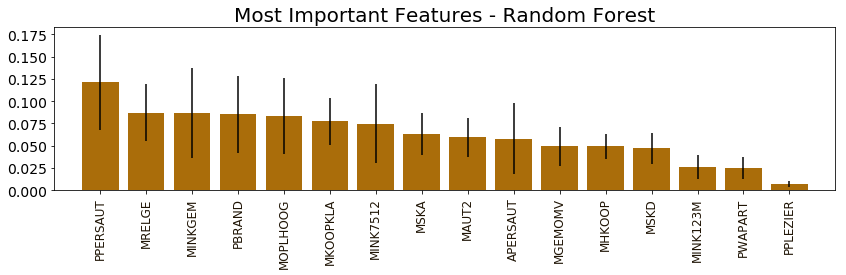

In [29]:
importances_RF = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_],
             axis=0)
indices1 = np.argsort(importances_RF[0:var])[::-1]

indices = indices1[0:var]
# Print the feature ranking
print("Feature ranking:")

for f in range(var):
    print("%d. %s (%f)" % (f + 1, (caravan.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]).reshape(-1)[indices[f]], importances_RF[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(14, 3))
plt.title("Most Important Features - Random Forest",size=20)
plt.bar(range(var), importances_RF[indices],
       color="#aa6d0a", yerr=std[indices], align="center")
plt.yticks(size=14)
plt.xticks(range(var), (caravan.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]).reshape(-1)[indices],rotation='vertical',size=12,color="#201506")
plt.xlim([-1, var])
plt.show()

In [30]:
FN_amount = -9950
TP_amount = 9950
TN_amount = 0
FP_amount = -50

if Final_Run:
    print('Compare Profit from Models - Test Set')
    print('-------------------------------------')

    Profit_DT     = (cm_DT_test[0][0]*TN_amount + cm_DT_test[1][0]*FN_amount + cm_DT_test[0][1]*FP_amount +
                   cm_DT_test[1][1]*TP_amount)
    print('Decision Tree Profit(Rs):        ' + str(Profit_DT))

    Profit_NB     = (cm_NB_test[0][0]*TN_amount + cm_NB_test[1][0]*FN_amount + cm_NB_test[0][1]*FP_amount + 
                  cm_NB_test[1][1]*TP_amount)
    print('Naive Bayes Profit(Rs):          ' + str(Profit_NB))

    Profit_MLP    = (cm_MLP_test[0][0]*TN_amount + cm_MLP_test[1][0]*FN_amount + cm_MLP_test[0][1]*FP_amount + 
                  cm_MLP_test[1][1]*TP_amount)
    print('Neural Network Profit(Rs):       ' + str(Profit_MLP))

    Profit_Log    = (cm_Log_test[0][0]*TN_amount + cm_Log_test[1][0]*FN_amount + cm_Log_test[0][1]*FP_amount + 
                  cm_Log_test[1][1]*TP_amount)
    print('Logistic Regression Profit(Rs):  ' + str(Profit_Log))
    
    
    y_pred_test = clf.predict(X_test)
    print('\n\nBest Model Accuracy on Test Set: '+"{:.2f}".format(accuracy_score(y_test, y_pred_test)*100)+'%')
    print('\nConfusion Matrix on Test Set  ')
    cm = confusion_matrix(y_test,y_pred_test)
    print(cm)
    print('\n')
    Profit = cm[0][0]*TN_amount + cm[1][0]*FN_amount + cm[0][1]*FP_amount + cm[1][1]*TP_amount
    print('Profit(Rs) for Test Set:        ' + str(Profit))
    
    # Checked Actual Positive and Negative Class in Test Set
    Max_Profit = 146*TN_amount + 0*FN_amount + 0*FP_amount + 4*TP_amount
    print('Max_Profit = ' + str(Max_Profit))
    
    print('\n')
    print('Test Set Profit % w.r.t Maximum Profit: ' + "{:.2f}".format(float(Profit)/Max_Profit*100)+'%')
    print('\n')
    print('Final Model')
    print('-----------')
    print(str(clf))


Compare Profit from Models - Test Set
-------------------------------------
Decision Tree Profit(Rs):        -214550
Naive Bayes Profit(Rs):          16450
Neural Network Profit(Rs):       -237500
Logistic Regression Profit(Rs):  94800


Best Model Accuracy on Test Set: 69.48%

Confusion Matrix on Test Set  
[[644 268]
 [ 29  32]]


Profit(Rs) for Test Set:        16450
Max_Profit = 39800


Test Set Profit % w.r.t Maximum Profit: 41.33%


Final Model
-----------
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


# Printing Out the Final Details

In [31]:
print(str(clf_DT));print('\n')
print(str(clf_NB));print('\n')
print(str(clf_MLP));print('\n')
print(str(clf_Log));print('\n')
print(str(clf_RF));print('\n')
print(str(clf_AdaB));print('\n')
print(str(clf_GB));print('\n')
print(str(clf_ET));print('\n')
print(str(clf_SVM));print('\n')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=64, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_